In [1]:
import numpy as np
import pandas as pd

In [2]:
import math
import numbers

In [3]:
from operator import itemgetter

In [4]:
import time

In [8]:
import random

In [ ]:
import matplotlib.pyplot as plt

### Data Preprocessing

In [5]:
df_300 = pd.read_csv("../../PEW_Jun29_300.csv")

In [6]:
df_300

,Worker ID,Saving for the future,Paying for college,Buying a home,Finding a spouse or partner,Finding a job,Getting into college,Staying in touch with family and friends,Do you currently live in the United States?,What is your age?
0,A2MS1GQLGAX9FZ,Harder,Harder,Harder,Harder,Harder,Easier,Easier,Yes,24.0
1,A211TN268BD80Q,Easier,Easier,Easier,Easier,Easier,Easier,Easier,Yes,4.0
2,A172PA5HBQNKQM,Harder,Same,Easier,Harder,Easier,Easier,Harder,Yes,25.0
3,AKZ3J53DA84EX,Easier,Easier,Easier,Easier,Easier,Easier,Easier,Yes,30.0
4,A3IOAOY6RR12YN,Easier,Easier,Easier,Harder,Easier,Easier,Easier,No,45.0
...,...,...,...,...,...,...,...,...,...,...
295,A7AXZSG0CTRLG,Same,Harder,Harder,Same,Same,Harder,Same,Yes,32.0
296,A172SQXS2LLR43,Harder,Easier,Easier,Easier,Harder,Harder,Easier,Yes,44.0
297,AWWBF2RVU8HNM,Easier,Easier,Easier,Easier,Easier,Easier,Easier,Yes,37.0
298,A3335ASFR3L0Z8,Harder,Harder,Harder,Harder,Harder,Same,Harder,Yes,33.0


In [7]:
question_types = ["radio", "radio", "radio", "radio", "radio", "radio", "radio", "radio", "estimate"]

In [9]:
c_age = df_300['What is your age?']
radix = [3, 3, 3, 3, 3, 3, 3, 2, int(c_age.max()-c_age.min())]

In [10]:
# n is number of samples to create
# radixes describes what a sample should look like: possibilities for each sample
def createSamples(n, radixes):

    samples = []
    length = len(radixes)

    for x in range(n):

        sample = []

        for y in range(length):

            # for each item, randomly choose using probabilities
            radix = radixes[y]

            newNumber = random.randint(0, radix-1)
            sample.append(newNumber)

        samples.append(sample)


    return np.array(samples)

In [11]:
sample_random = createSamples(300,radix)
sample_random

array([[ 2,  2,  0, ...,  1,  1, 39],
       [ 2,  2,  0, ...,  0,  1, 19],
       [ 0,  0,  1, ...,  0,  0, 36],
       ...,
       [ 0,  0,  0, ...,  2,  1, 62],
       [ 1,  2,  2, ...,  2,  0, 34],
       [ 1,  2,  0, ...,  2,  1, 43]])

In [15]:
sample_random2 = createSamples(300,radix)
sample_random2

array([[ 1,  2,  1, ...,  2,  1, 32],
       [ 2,  2,  0, ...,  1,  1, 42],
       [ 1,  2,  1, ...,  0,  1, 57],
       ...,
       [ 0,  1,  2, ...,  2,  0,  7],
       [ 2,  0,  0, ...,  0,  1, 45],
       [ 2,  1,  1, ...,  1,  1, 26]])

In [12]:
sample_300 = np.array(df_300.drop('Worker ID', axis=1).applymap(
    # convert answers to integers (within radix)
    lambda x: {
        # dictionary for radio question
        'Easier': 0,
        'Same': 1,
        'Harder': 2,
        # dictionary for boolean radio
        'Yes': 1,
        'No': 0,
    }.get(x, int(x) if isinstance(x, numbers.Number) else x) # if an estimate, make it an int number
))
sample_300

array([[ 2,  2,  2, ...,  0,  1, 24],
       [ 0,  0,  0, ...,  0,  1,  4],
       [ 2,  1,  0, ...,  2,  1, 25],
       ...,
       [ 0,  0,  0, ...,  0,  1, 37],
       [ 2,  2,  2, ...,  2,  1, 33],
       [ 0,  2,  0, ...,  0,  1, 39]])

### Measuring row-wise sum distance

In [14]:
# this is the mean of random sample that we are comparing with
mean_random = sample_random.mean(axis=0)
mean_random

array([ 0.96666667,  0.99666667,  0.92666667,  1.01333333,  1.01666667,
        0.95666667,  1.02666667,  0.51      , 30.84333333])

In [24]:
def mean_distance(samples1: np.ndarray, mean: np.ndarray, radixes):
    numberOfSamples = samples1.shape[0]
    complexity = len(radixes)
    
    distance = np.zeros(samples1.shape[0])
    
    for x in range(numberOfSamples):
            s1 = samples1[x]

            total = 0
            for z in range(complexity):
                # check the question type
                if question_types[z] == "radio" or question_types[z] == "checkbox":

                    # for radio and checkbox questions, different is 1 and same is 0
                    if s1[z] != mean[z]:
                        total += 1

                else:
                    # Right now the only other case is estimate. For these, normalize between 0 and 1
                    radix = radixes[z]
                    total += abs((mean[z] - s1[z])/radix)

            distance[x] = total

    return distance

In [28]:
# Sample vs Random
distance_300 = mean_distance(sample_300, mean_random, radix)
distance_300.sum()

2438.7744615384618

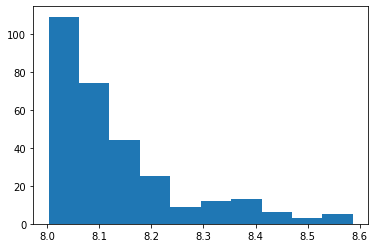

In [131]:
plt.hist(distance_300)
plt.show()

In [29]:
# Random vs Random
distance_rand = mean_distance(sample_random2, mean_random, radix)
distance_rand.sum()

2472.3175384615383

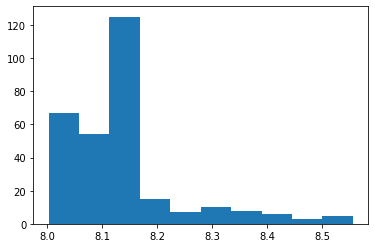

In [132]:
plt.hist(distance_rand)
plt.show()

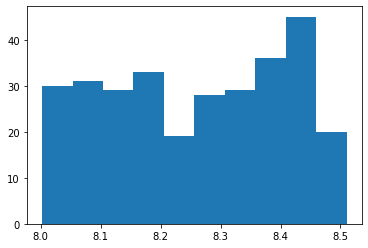

In [147]:
sample_random3 = createSamples(300,radix)

distance_rand3 = mean_distance(sample_random3, mean_random, radix)
plt.hist(distance_rand3)
plt.show()

In [34]:
# Random vs Random (iterated)
rvr_distances = []
for i in range(0,10000):
    if i % 100 == 0:
        print(".", end="")
    
    sample_random_temp = createSamples(300,radix)
    
    distance_rand = mean_distance(sample_random_temp, mean_random, radix)
    rvr_distances.append(distance_rand.sum())

....................................................................................................

In [35]:
np.array(rvr_distances).mean()

2475.0436774358973

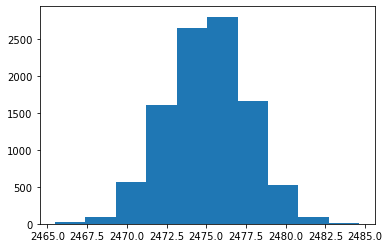

In [41]:
plt.hist(np.array(rvr_distances))
plt.show()

### Adversarial Sample Building

In [43]:
radix

[3, 3, 3, 3, 3, 3, 3, 2, 65]

In [156]:
n = 200  # number of handcrafted samples

In [157]:
sample_adv = np.concatenate((
    [[2,2,2,2,2,2,2,1,60]]*n,
    sample_300[n:,:]
))

distance_adv = mean_distance(sample_adv, mean_random, radix)
distance_adv.sum()

2501.1341538461543

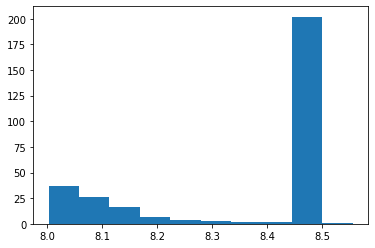

In [158]:
plt.hist(distance_adv)
plt.show()

In [178]:
n = 200  # number of handcrafted samples

sample_adv = np.concatenate((
    [[0,0,0,0,0,0,0,1,47]]*n,
    sample_random2[n:,:]
))

distance_adv = mean_distance(sample_adv, mean_random, radix)
distance_adv.sum()

2474.6147692307695

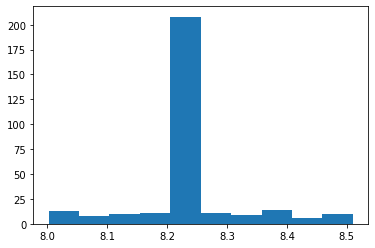

In [179]:
plt.hist(distance_adv)
plt.show()

### 3k data?

In [115]:
df_3k = pd.read_csv("../../../pew_3k.csv")
sample_3k = np.array(df_3k.drop(['Worker ID', 'cost', 'updated', 'round'], axis=1).applymap(
    # convert answers to integers (within radix)
    lambda x: {
        # dictionary for radio question
        'Easier': 0,
        'Same': 1,
        'Harder': 2,
        # dictionary for boolean radio
        'Yes': 1,
        'No': 0,
    }.get(x, int(x) if isinstance(x, numbers.Number) else x) # if an estimate, make it an int number
))
sample_3k

array([[ 2,  2,  0, ...,  0,  1, 26],
       [ 2,  2,  2, ...,  1,  1, 29],
       [ 2,  2,  0, ...,  0,  1, 62],
       ...,
       [ 1,  2,  2, ...,  0,  0, 34],
       [ 2,  2,  2, ...,  0,  1, 36],
       [ 2,  1,  2, ...,  0,  1, 35]])

In [117]:
sample_random_3k = createSamples(3000,radix)
sample_random_3k

array([[ 1,  1,  2, ...,  1,  1, 18],
       [ 2,  2,  0, ...,  0,  1, 31],
       [ 2,  1,  1, ...,  1,  0, 55],
       ...,
       [ 0,  0,  2, ...,  1,  0, 17],
       [ 0,  2,  1, ...,  1,  0, 62],
       [ 2,  2,  2, ...,  2,  0, 32]])

In [121]:
mean_random_3k = sample_random_3k.mean(axis=0)
mean_random_3k

array([ 1.00233333,  1.00466667,  1.03133333,  0.99133333,  0.975     ,
        1.01366667,  1.00066667,  0.50366667, 32.29733333])

In [122]:
# Sample vs Random
distance_3k = mean_distance(sample_3k, mean_random_3k, radix)
distance_3k.sum()

29395.078851282055

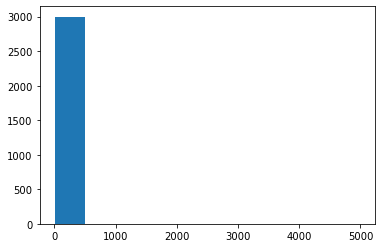

In [130]:
plt.hist(distance_3k)
plt.show()

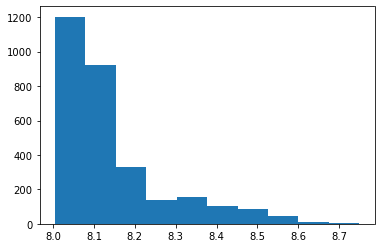

In [139]:
plt.hist(distance_3k[distance_3k < 10])
plt.show()

In [152]:
distance_3k[distance_3k < 10].sum()/2998*3000

24418.59783445374

In [134]:
# Random vs Random
sample_random_3k_2 = createSamples(3000,radix)

distance_rand_3k = mean_distance(sample_random_3k_2, mean_random_3k, radix)
distance_rand_3k.sum()

24736.87072820513

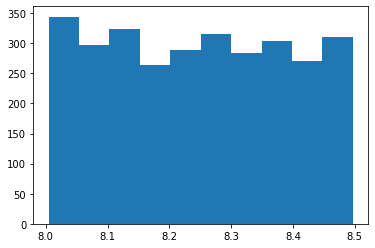

In [133]:
plt.hist(distance_rand_3k)
plt.show()

In [124]:
# Random vs Random (iterated)
rvr_distances_3k = []
for i in range(0,10000):
    if i % 100 == 0:
        print(".", end="")
    
    sample_random_temp = createSamples(3000,radix)
    
    distance_rand_3k = mean_distance(sample_random_temp, mean_random_3k, radix)
    rvr_distances_3k.append(distance_rand_3k.sum())

....................................................................................................

In [125]:
np.array(rvr_distances_3k).mean()

24749.9774769641

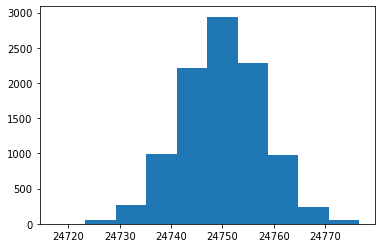

In [126]:
plt.hist(np.array(rvr_distances_3k))
plt.show()